## Data Exploration

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats

In [2]:
#Importing Cleaned Dataframe
df = pd.read_csv('Data/clean_data.csv')
df.head()

,InvoiceNo,StockCode,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,Completed


In [3]:
#Set Invoice Date type to datetime to convert as a month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
StockCode              object
Products               object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Sales                 float64
Status                 object
dtype: object

Data Overview

In [4]:
#Data Overview 
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
count,406829.000000,406829,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 03:16:19.124890624,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 00:00:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 00:00:00,1.250000,13953.000000,4.200000
50%,5.000000,2011-07-31 00:00:00,1.950000,15152.000000,11.100000
75%,12.000000,2011-10-20 00:00:00,3.750000,16791.000000,19.500000
max,80995.000000,2011-12-09 00:00:00,38970.000000,18287.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,427.591718


In [5]:
#Total Sales
Total_sales = df[['Sales']].sum()
Total_sales

Sales    8300065.814
dtype: float64

In [6]:
#Total Completed Order
Total_order = df[df.Status == 'Completed']
Total_order = Total_order['InvoiceNo'].nunique()
Total_order

18536

In [7]:
#Total Canceled Order
Total_cancel = df[df.Status == 'Canceled']
Total_cancel = Total_cancel['InvoiceNo'].nunique()
Total_cancel

3654

In [8]:
#Total Products
Total_Products = df[['Products']].nunique()
Total_Products

Products    3896
dtype: int64

In [9]:
#Total Number of Customer
Total_Customer = df[['CustomerID']].nunique()
Total_Customer

CustomerID    4372
dtype: int64

In [10]:
#Total Countries
Total_Countries = df[['Country']].nunique()
Total_Countries

Country    37
dtype: int64

Data Exploration

In [11]:
#Monthly sales over the years
monthly_sales = df.copy()
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month_name(locale='English') #Convert Invoice Date to Month in new Column
monthly_sales['Year'] = pd.DatetimeIndex(monthly_sales['InvoiceDate']).year

#Group by month
monthly_sales['Year'] = monthly_sales['Year'].apply(str)
monthly_sales['Month-Year'] = monthly_sales['Month']+"-"+monthly_sales['Year']
monthly_sales = monthly_sales[['Month-Year','Sales']]
monthly_sales = monthly_sales.groupby('Month-Year', sort=False)['Sales'].sum()
monthly_sales

Month-Year
December-2010      554604.020
January-2011       475074.380
February-2011      436546.150
March-2011         579964.610
April-2011         426047.851
May-2011           648251.080
June-2011          608013.160
July-2011          574238.481
August-2011        616368.000
September-2011     931440.372
October-2011       974603.590
November-2011     1132407.740
December-2011      342506.380
Name: Sales, dtype: float64

In [45]:
#Average Monthly Sales
monthly_sales.describe()

count    1.300000e+01
mean     6.384666e+05
std      2.343563e+05
min      3.425064e+05
25%      4.750744e+05
50%      5.799646e+05
75%      6.482511e+05
max      1.132408e+06
Name: Sales, dtype: float64

Text(0, 0.5, 'In Millions of Pounds')

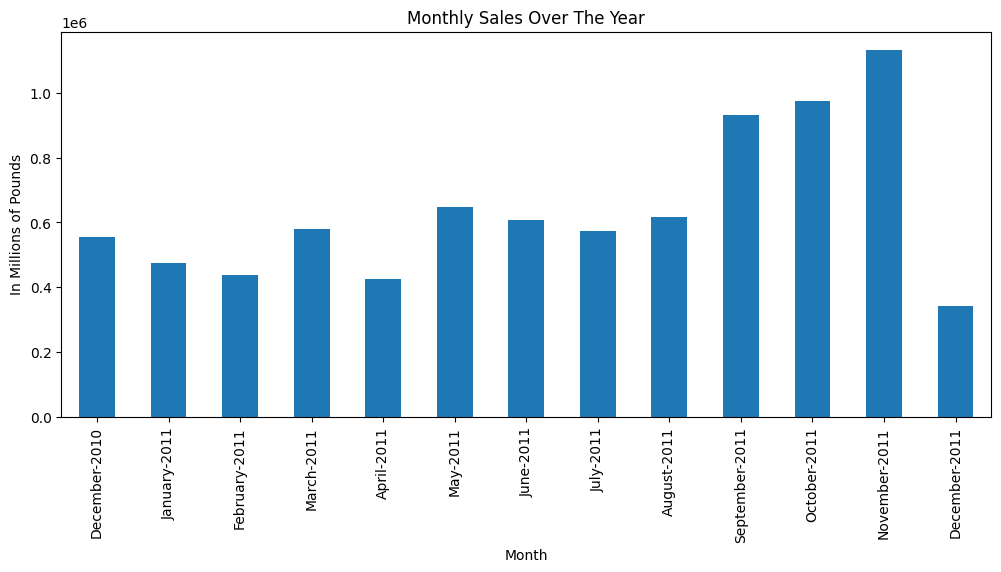

In [12]:
#Draw the line plot
m_sales = monthly_sales.plot(kind='bar', title='Monthly Sales Over The Year', figsize=(12,5))
m_sales.set_xlabel('Month')
m_sales.set_ylabel('In Millions of Pounds')

Sales Trend for Top 5 Spending Countries

Text(0, 0.5, 'In Millions of Pounds')

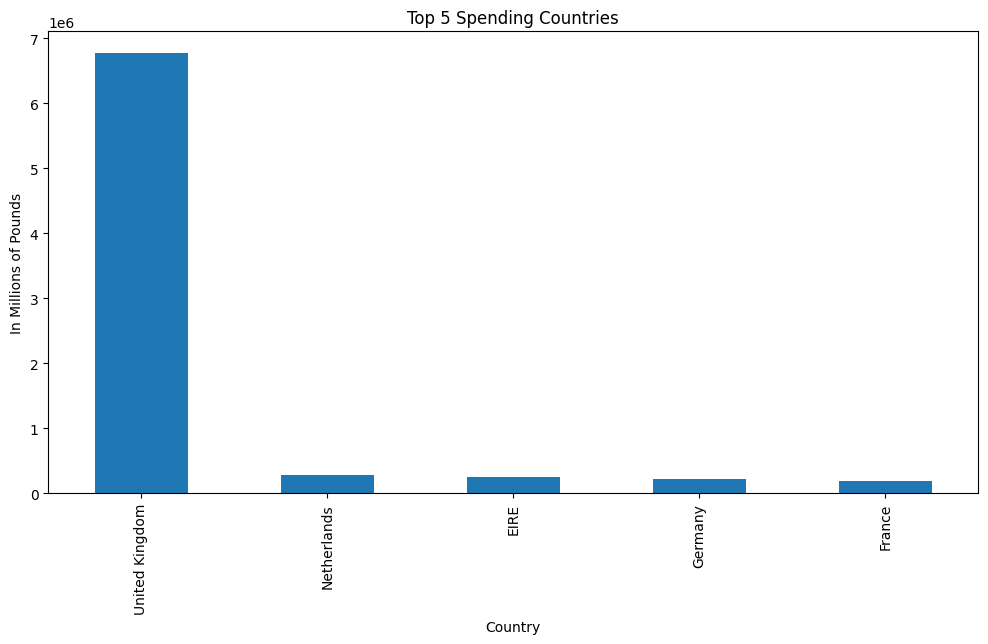

In [13]:
#Top 5 Spending Countries
top_countries = df[['Country','Sales']].groupby('Country')['Sales'].sum().nlargest(5)

#Draw The Plot
countries_plot = top_countries.plot(kind='bar', title='Top 5 Spending Countries', figsize=(12,6))
countries_plot.set_xlabel('Country')
countries_plot.set_ylabel('In Millions of Pounds')


In [52]:
top_countriess = df[['Country','Sales']].groupby('Country')['Sales'].sum().nlargest(5)
top_countriess

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Name: Sales, dtype: float64

In [14]:
#Top Countries Dataframe
top_countries = df.copy()

#Monthly sales of the top countries over the years
top_countries['Month'] = top_countries['InvoiceDate'].dt.month_name(locale='English') #Convert Invoice Date to Month in new Column
top_countries['Year'] = pd.DatetimeIndex(top_countries['InvoiceDate']).year

#Group by month
top_countries['Year'] = top_countries['Year'].apply(str)
top_countries['Month-Year'] = top_countries['Month']+"-"+top_countries['Year']
top_countries = top_countries[['Month-Year','Sales','Country','Products','Quantity']]

Text(0, 0.5, 'In Pounds')

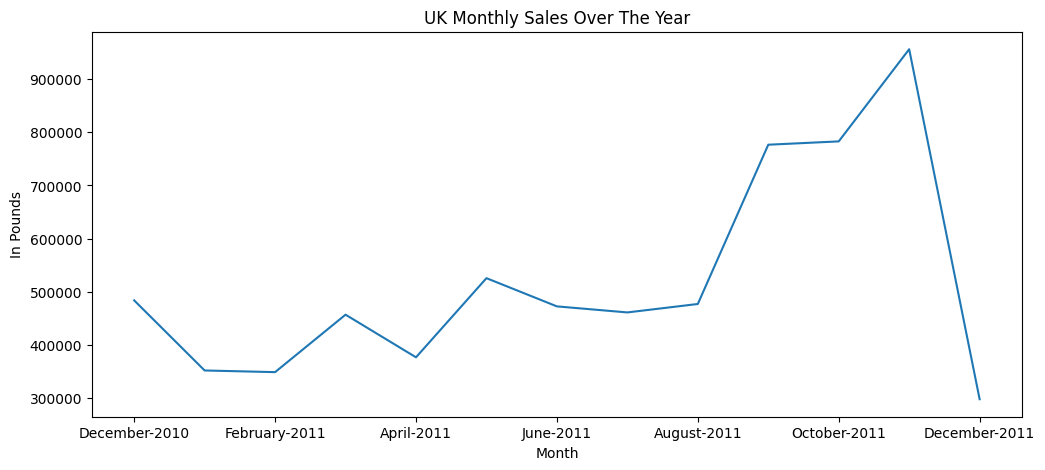

In [15]:
#United Kingdom
sales_uk = top_countries[top_countries.Country == 'United Kingdom']

#UK sales over the years
sales_uk = sales_uk.groupby('Month-Year', sort=False)['Sales'].sum()

#Draw the line plot
plot_uk = sales_uk.plot(kind='line', title='UK Monthly Sales Over The Year', figsize=(12,5))
plot_uk.set_xlabel('Month')
plot_uk.set_ylabel('In Pounds')

Text(0, 0.5, 'In Pounds')

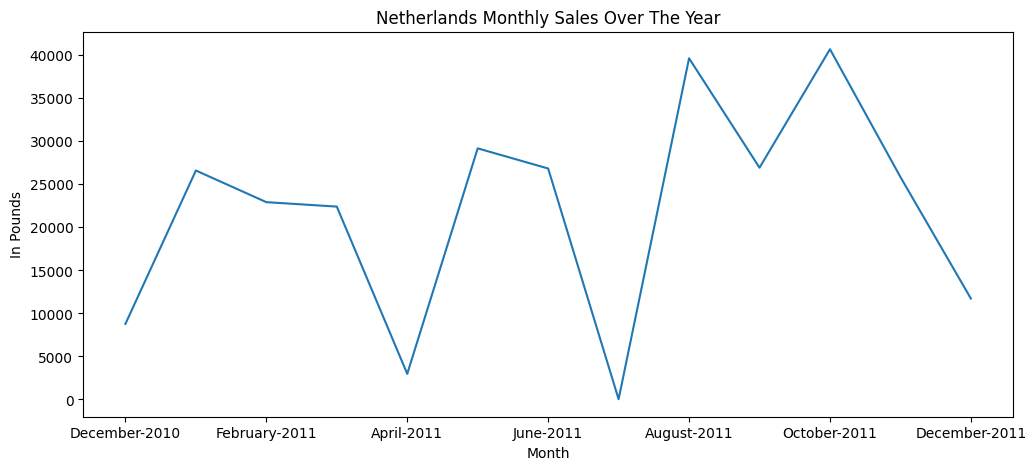

In [16]:
#Netherlands
sales_Netherlands = top_countries[top_countries.Country == 'Netherlands']

#Netherlands sales over the years
sales_Netherlands = sales_Netherlands.groupby('Month-Year', sort=False)['Sales'].sum()

#Draw the line plot
plot_Netherlands = sales_Netherlands.plot(kind='line', title='Netherlands Monthly Sales Over The Year', figsize=(12,5))
plot_Netherlands.set_xlabel('Month')
plot_Netherlands.set_ylabel('In Pounds')

Text(0, 0.5, 'In Pounds')

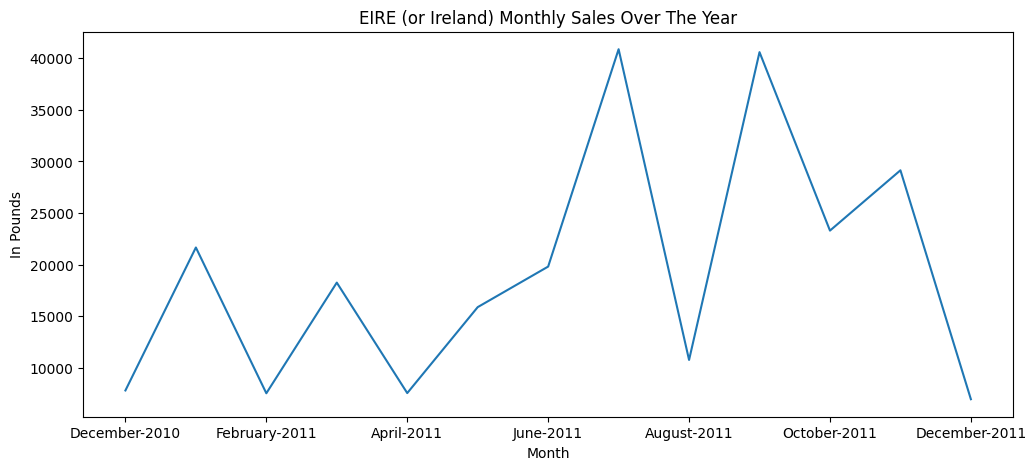

In [17]:
#EIRE or Ireland
sales_EIRE = top_countries[top_countries.Country == 'EIRE']

#EIRE sales over the years
sales_EIRE = sales_EIRE.groupby('Month-Year', sort=False)['Sales'].sum()

#Draw the line plot
plot_EIRE = sales_EIRE.plot(kind='line', title='EIRE (or Ireland) Monthly Sales Over The Year', figsize=(12,5))
plot_EIRE.set_xlabel('Month')
plot_EIRE.set_ylabel('In Pounds')

In [53]:
sales_EIRE

Month-Year
December-2010      7825.57
January-2011      21671.52
February-2011      7551.92
March-2011        18270.28
April-2011         7570.50
May-2011          15894.78
June-2011         19822.79
July-2011         40874.15
August-2011       10781.00
September-2011    40590.69
October-2011      23307.62
November-2011     29148.03
December-2011      6976.37
Name: Sales, dtype: float64

Text(0, 0.5, 'In Pounds')

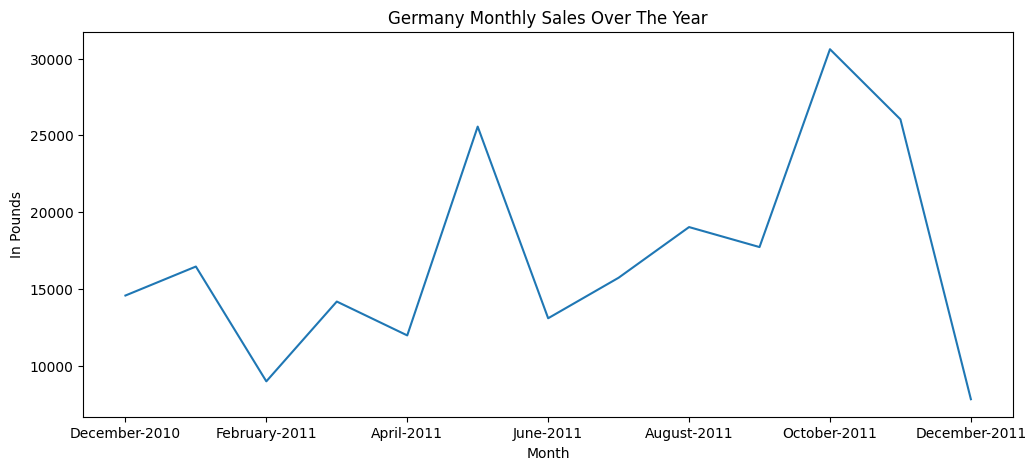

In [18]:
#Germany
sales_Germany = top_countries[top_countries.Country == 'Germany']

#Germany sales over the years
sales_Germany = sales_Germany.groupby('Month-Year', sort=False)['Sales'].sum()

#Draw the line plot
plot_germany = sales_Germany.plot(kind='line', title='Germany Monthly Sales Over The Year', figsize=(12,5))
plot_germany.set_xlabel('Month')
plot_germany.set_ylabel('In Pounds')

Text(0, 0.5, 'In Pounds')

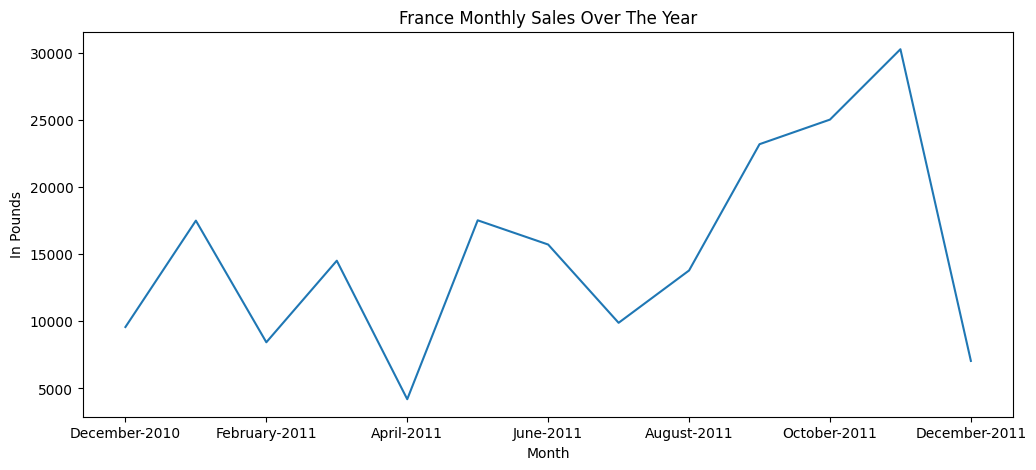

In [19]:
#France
sales_France = top_countries[top_countries.Country == 'France']

#Germany sales over the years
sales_France = sales_France.groupby('Month-Year', sort=False)['Sales'].sum()

#Draw the line plot
plot_france = sales_France.plot(kind='line', title='France Monthly Sales Over The Year', figsize=(12,5))
plot_france.set_xlabel('Month')
plot_france.set_ylabel('In Pounds')

Top Selling Products

In [20]:
#Top Products Dataframe
top_products = df.copy()
top_products = top_products[['Country','Sales','Quantity','Products']]

In [21]:
#Top Selling Products by Sales
product_sales = top_products[['Products','Sales']].groupby('Products')['Sales'].sum().nlargest(5)

#Top Selling Products by Quantity
product_quantity = top_products[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

Text(0, 0.5, 'Quantity')

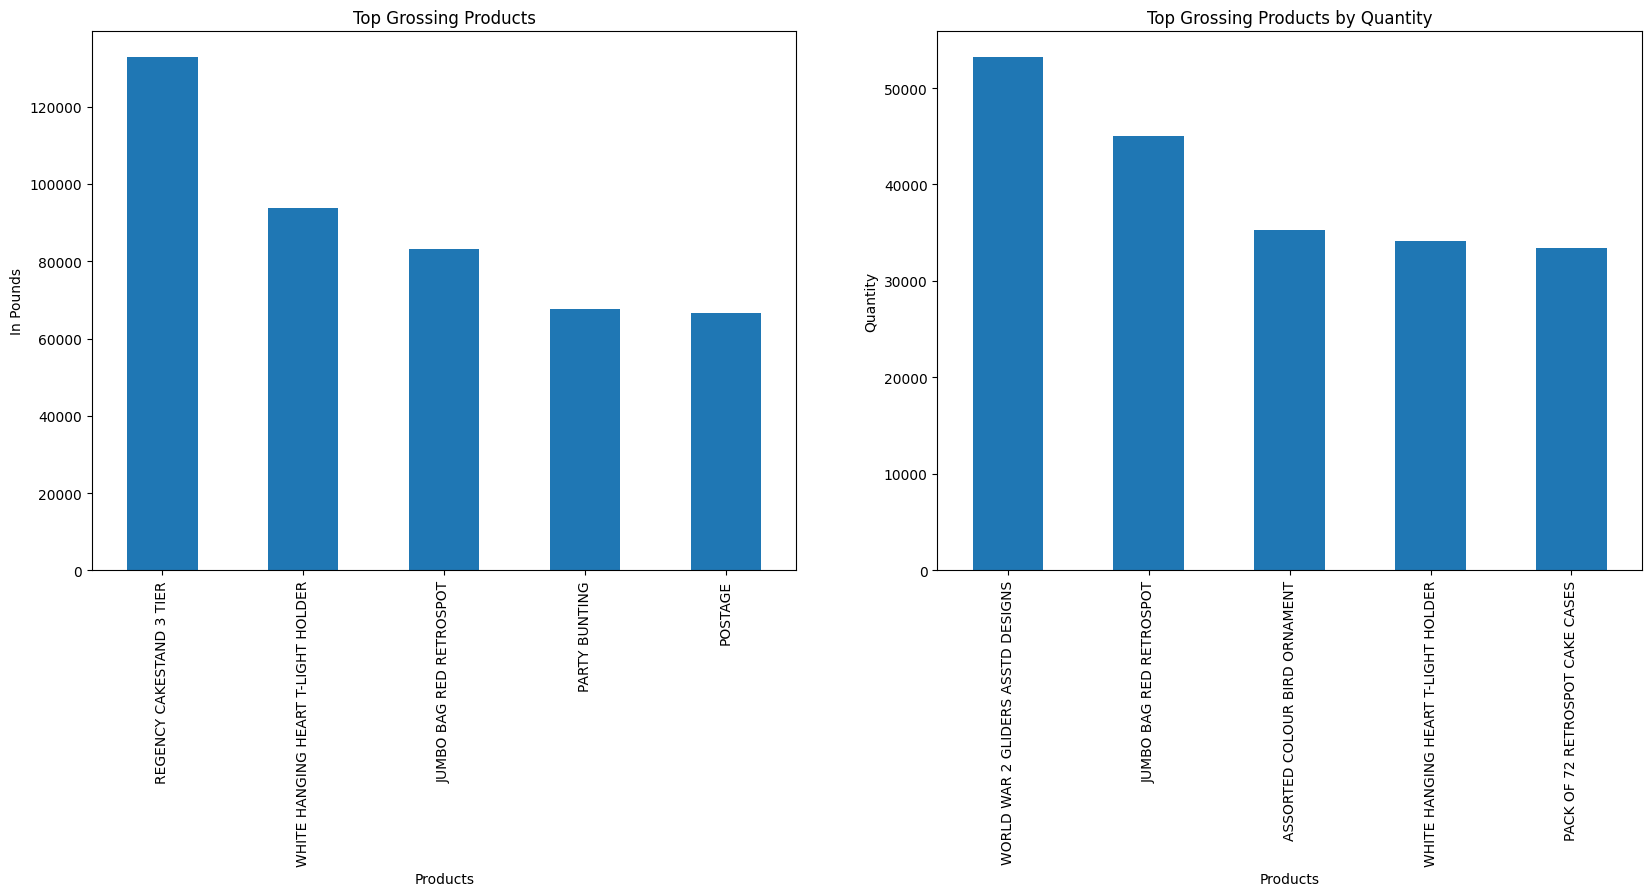

In [22]:
#Draw The Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1 = product_sales.plot(kind='bar',title='Top Grossing Products' , ax=ax[0])
ax1.set_xlabel('Products')
ax1.set_ylabel('In Pounds')

ax2 = product_quantity.plot(kind='bar', title='Top Grossing Products by Quantity', ax=ax[1])
ax2.set_xlabel('Products')
ax2.set_ylabel('Quantity')

Top Selling Products for highest spending countries

Text(0, 0.5, 'Quantity')

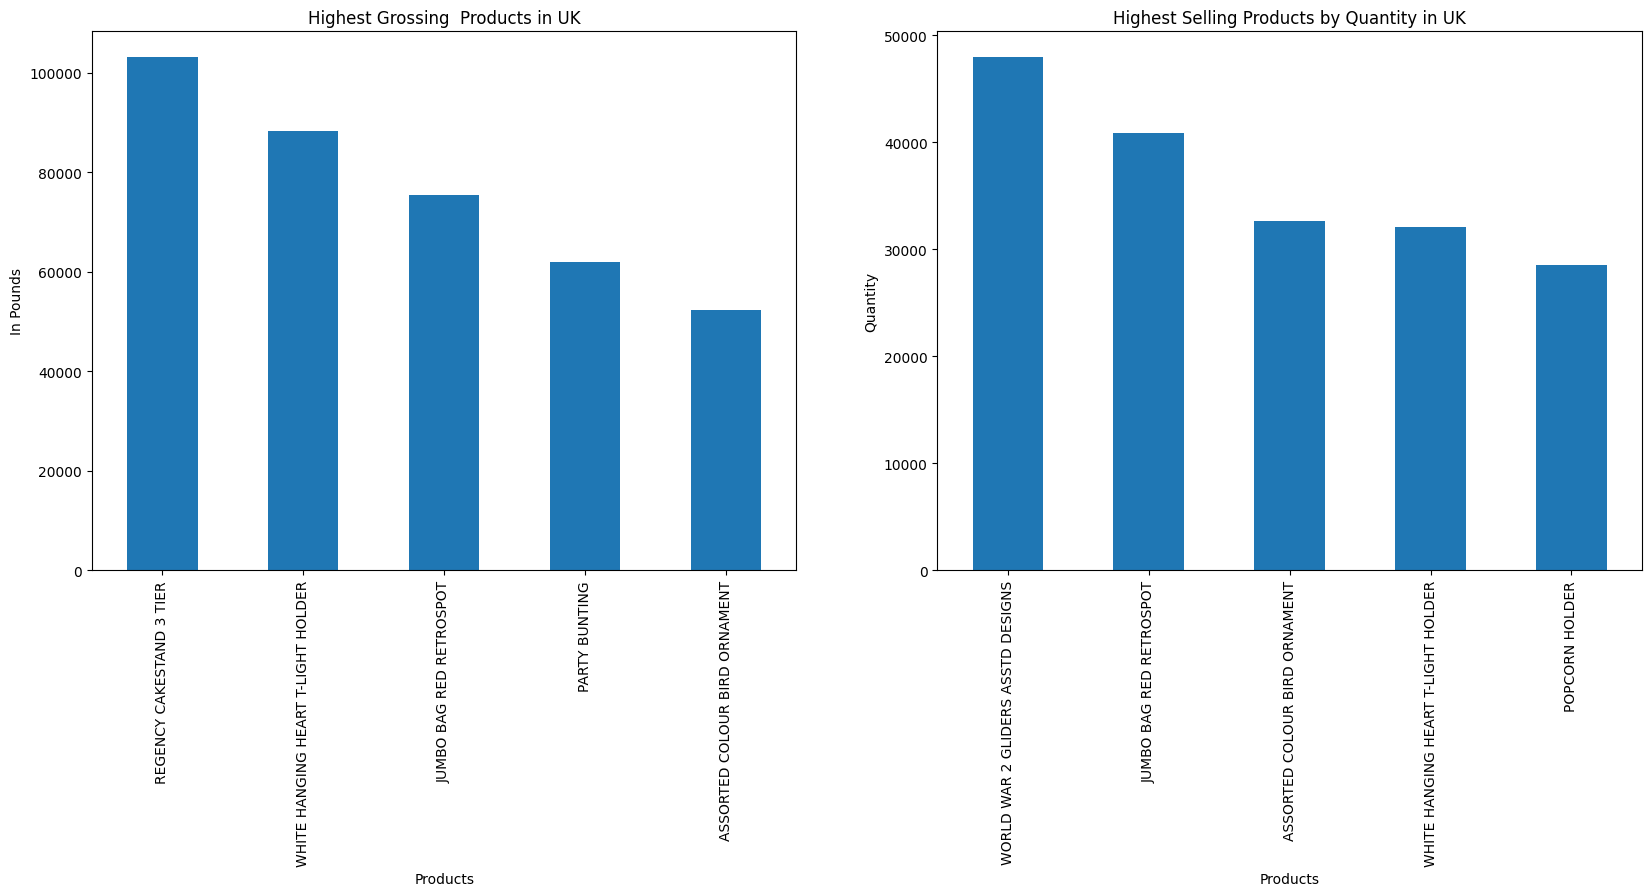

In [23]:
#United Kingdom

prod_uk = top_countries[top_countries.Country == 'United Kingdom']

#UK Top Selling Products by Sales
psales_uk = prod_uk[['Products','Sales']].groupby('Products')['Sales'].sum().nlargest(5)

#UK Top Selling Products by Quantity
pqty_uk = prod_uk[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

#Draw The Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1 = psales_uk.plot(kind='bar',title='Highest Grossing  Products in UK' , ax=ax[0])
ax1.set_xlabel('Products')
ax1.set_ylabel('In Pounds')

ax2 = pqty_uk.plot(kind='bar', title='Highest Selling Products by Quantity in UK', ax=ax[1])
ax2.set_xlabel('Products')
ax2.set_ylabel('Quantity')


Text(0, 0.5, 'Quantity')

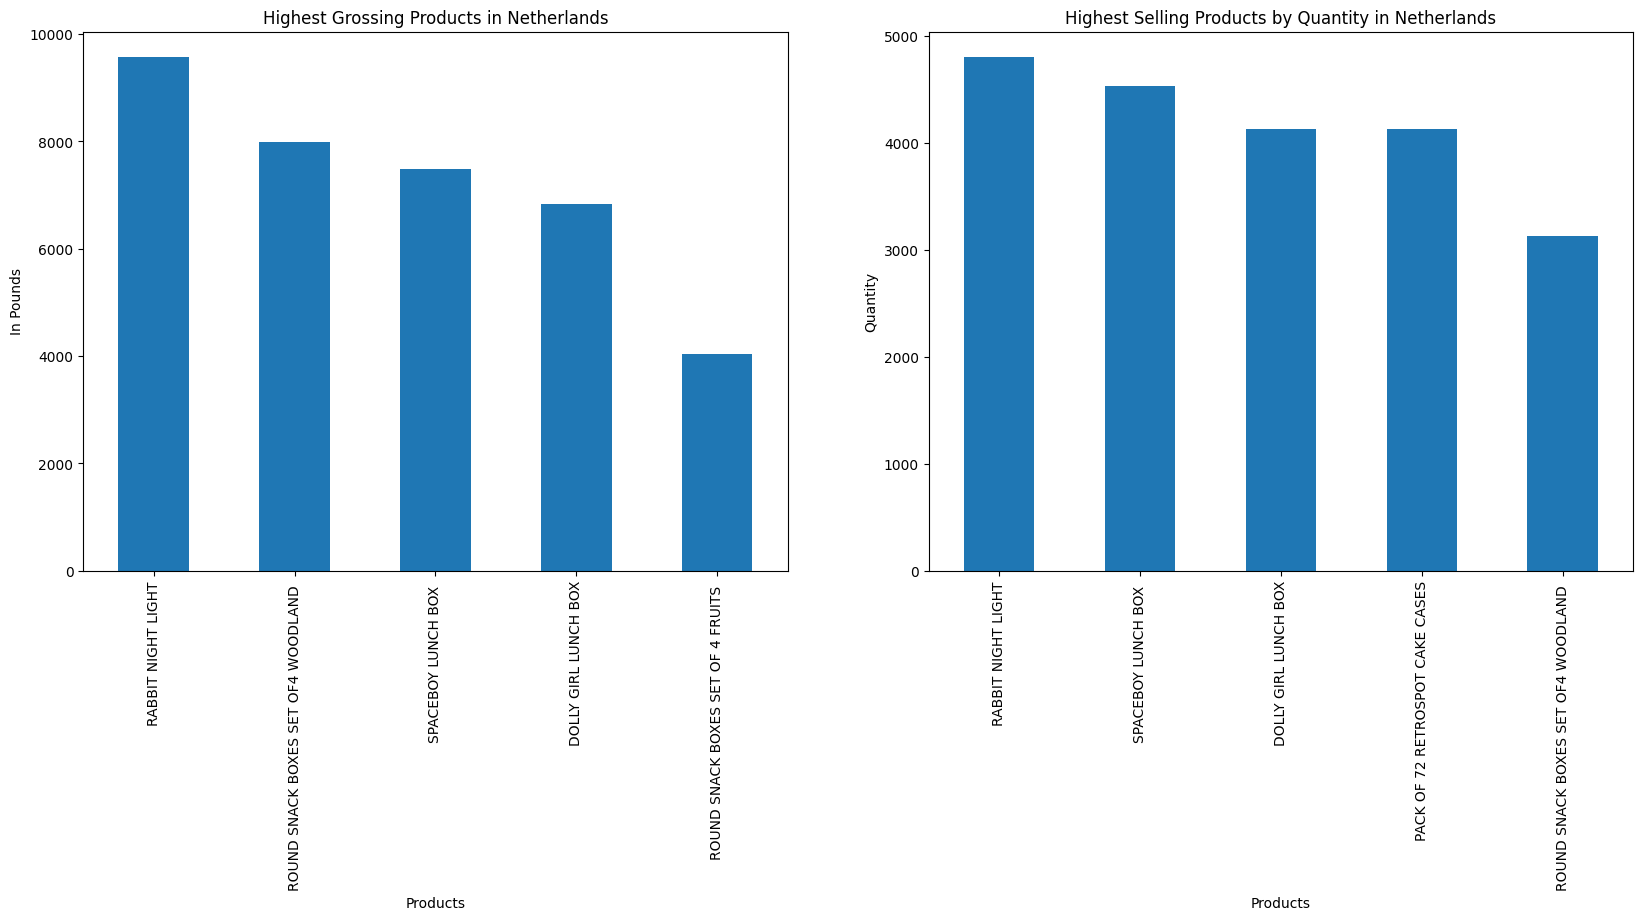

In [24]:
#Netherlands

prod_nt = top_countries[top_countries.Country == 'Netherlands']

#UK Top Selling Products by Sales
psales_nt = prod_nt[['Products','Sales']].groupby('Products')['Sales'].sum().nlargest(5)

#UK Top Selling Products by Quantity
pqty_nt = prod_nt[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

#Draw The Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1 = psales_nt.plot(kind='bar',title='Highest Grossing Products in Netherlands' , ax=ax[0])
ax1.set_xlabel('Products')
ax1.set_ylabel('In Pounds')

ax2 = pqty_nt.plot(kind='bar', title='Highest Selling Products by Quantity in Netherlands', ax=ax[1])
ax2.set_xlabel('Products')
ax2.set_ylabel('Quantity')

Text(0, 0.5, 'Quantity')

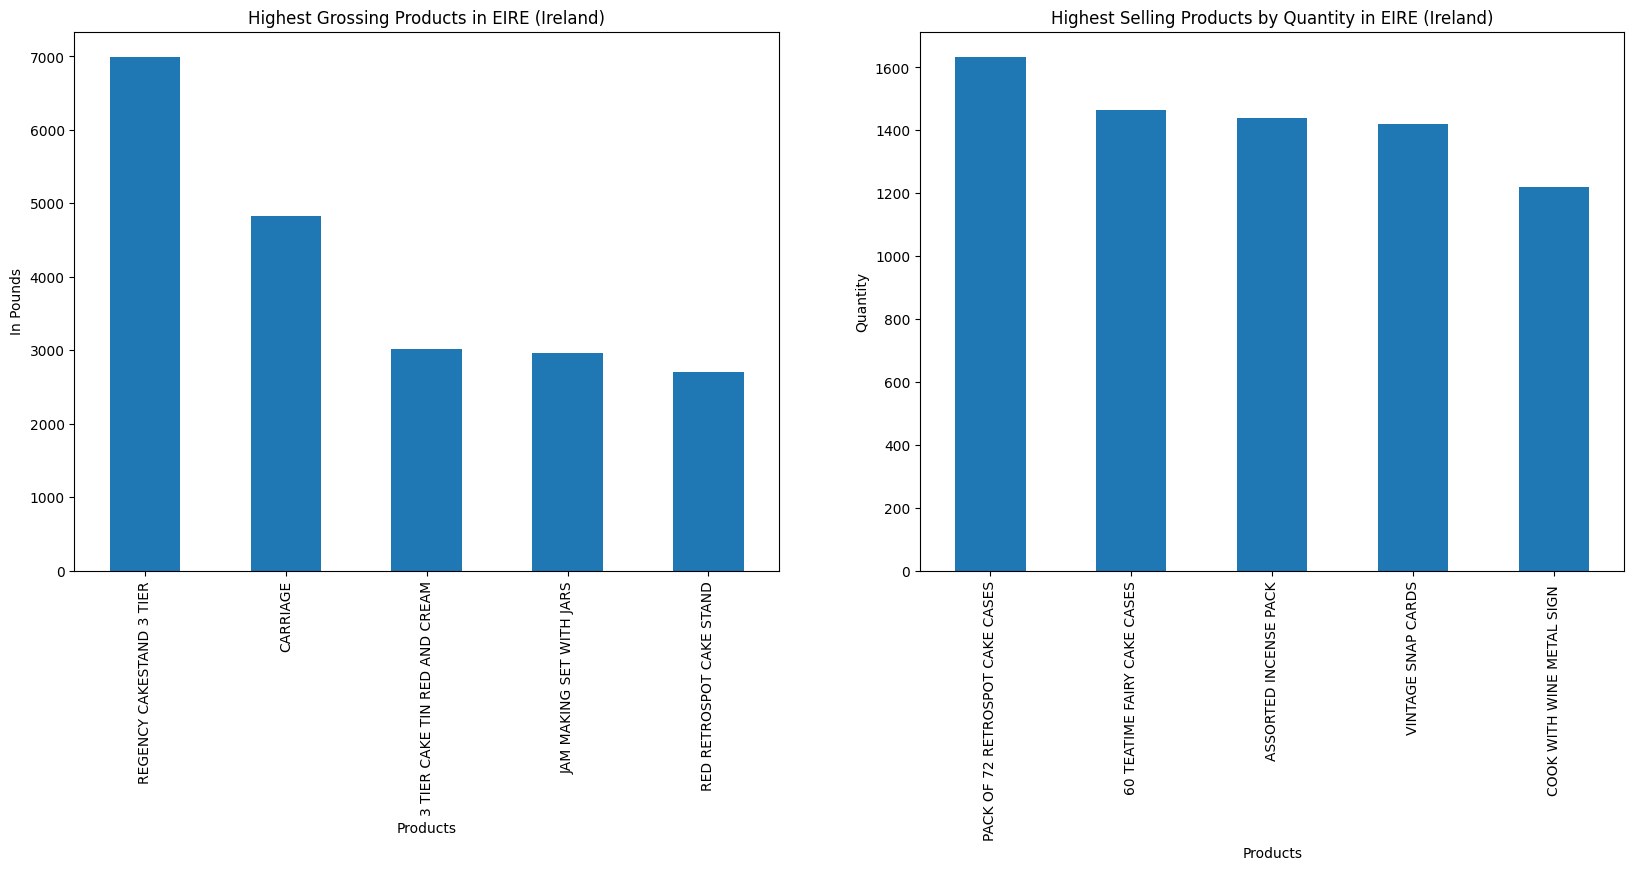

In [25]:
#EIRE or Ireland

prod_ir = top_countries[top_countries.Country == 'EIRE']

#UK Top Selling Products by Sales
psales_ir = prod_ir[['Products','Sales']].groupby('Products')['Sales'].sum().nlargest(5)

#UK Top Selling Products by Quantity
pqty_ir = prod_ir[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

#Draw The Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1 = psales_ir.plot(kind='bar',title='Highest Grossing Products in EIRE (Ireland)' , ax=ax[0])
ax1.set_xlabel('Products')
ax1.set_ylabel('In Pounds')

ax2 = pqty_ir.plot(kind='bar', title='Highest Selling Products by Quantity in EIRE (Ireland)', ax=ax[1])
ax2.set_xlabel('Products')
ax2.set_ylabel('Quantity')

Text(0, 0.5, 'Quantity')

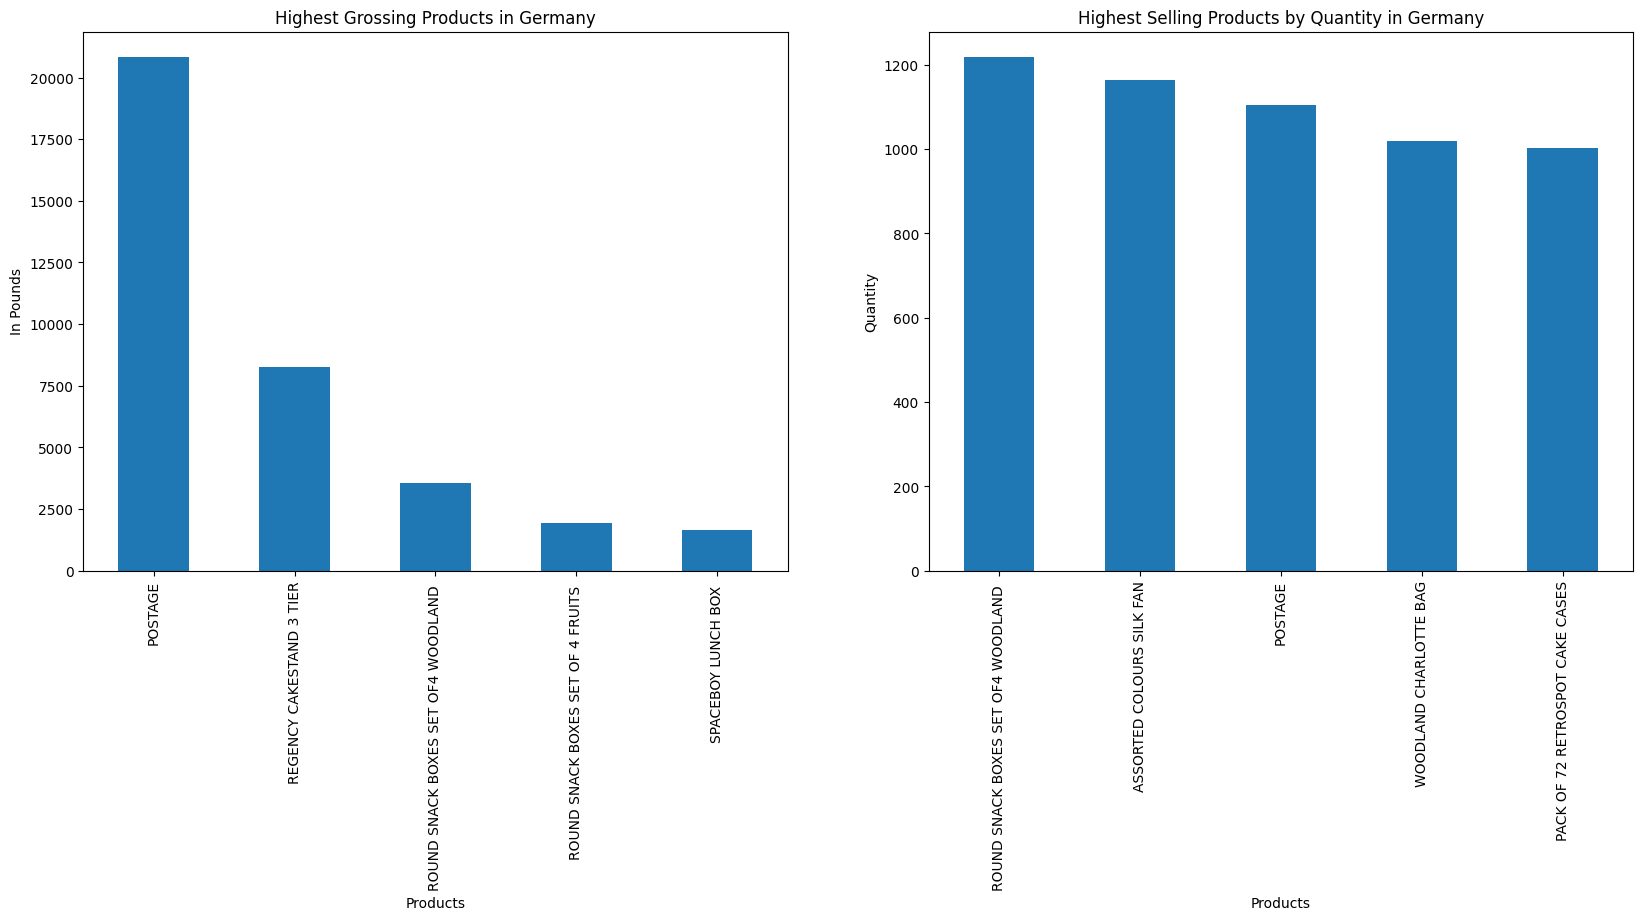

In [26]:
#Germany

prod_ger = top_countries[top_countries.Country == 'Germany']

#UK Top Selling Products by Sales
psales_ger = prod_ger[['Products','Sales']].groupby('Products')['Sales'].sum().nlargest(5)

#UK Top Selling Products by Quantity
pqty_ger = prod_ger[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

#Draw The Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1 = psales_ger.plot(kind='bar',title='Highest Grossing Products in Germany' , ax=ax[0])
ax1.set_xlabel('Products')
ax1.set_ylabel('In Pounds')

ax2 = pqty_ger.plot(kind='bar', title='Highest Selling Products by Quantity in Germany', ax=ax[1])
ax2.set_xlabel('Products')
ax2.set_ylabel('Quantity')

Text(0, 0.5, 'Quantity')

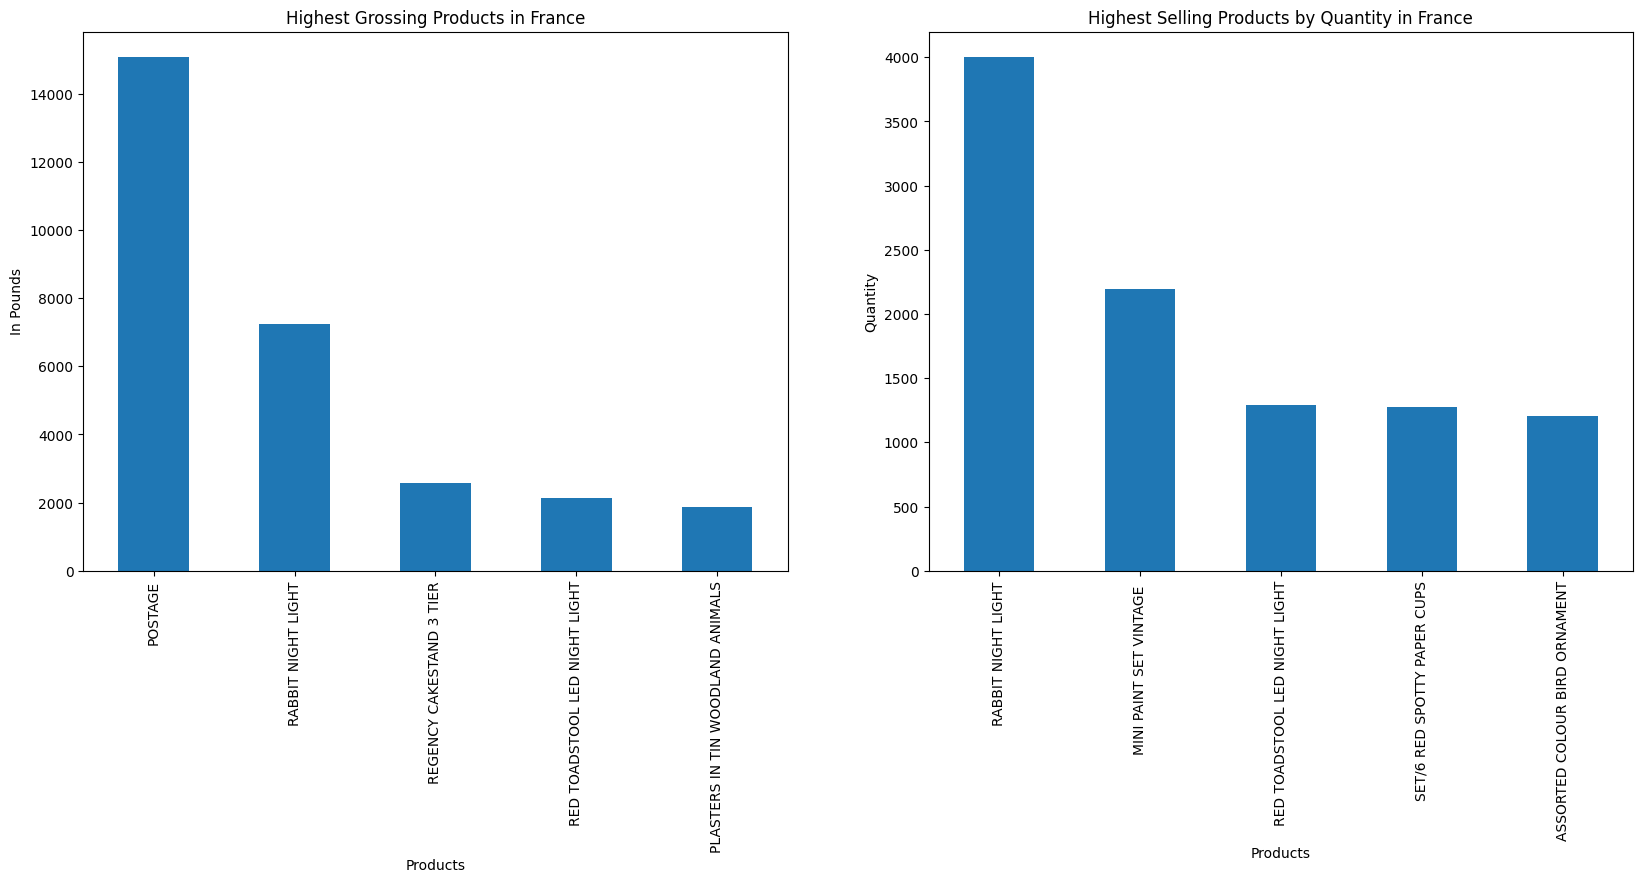

In [27]:
#France
prod_fr = top_countries[top_countries.Country == 'France']

#UK Top Selling Products by Sales
psales_fr = prod_fr[['Products','Sales']].groupby('Products')['Sales'].sum().nlargest(5)

#UK Top Selling Products by Quantity
pqty_fr = prod_fr[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

#Draw The Bar Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1 = psales_fr.plot(kind='bar',title='Highest Grossing Products in France' , ax=ax[0])
ax1.set_xlabel('Products')
ax1.set_ylabel('In Pounds')

ax2 = pqty_fr.plot(kind='bar', title='Highest Selling Products by Quantity in France', ax=ax[1])
ax2.set_xlabel('Products')
ax2.set_ylabel('Quantity')

Cancellation Rate

In [28]:
#Cancellation Dataframe grouped by Invoice
df_status = df.copy()
df_status = df_status.groupby('InvoiceNo', as_index=False, sort=False ).agg({'InvoiceNo':'first','InvoiceDate':'first',
                                                                             'UnitPrice':'mean','Quantity':'sum', 'CustomerID':'first',
                                                                             'Sales':'sum', 'Country':'first','Status':'first',
                                                                             'StockCode':'first', 'Products':'first'})

#Since the canceled order inputted as negative, convert to positive to make the pie chart
df_status.loc[df_status['Status'] == 'Canceled', 'Sales'] = abs(df_status['Sales']) 
df_status.loc[df_status['Status'] == 'Canceled', 'Quantity'] = abs(df_status['Quantity']) 

#Checking
df_status[df_status.Status == 'Canceled']

,InvoiceNo,InvoiceDate,UnitPrice,Quantity,CustomerID,Sales,Country,Status,StockCode,Products
16,C536379,2010-12-01,27.500000,1,14527,27.50,United Kingdom,Canceled,D,Discount
18,C536383,2010-12-01,4.650000,1,15311,4.65,United Kingdom,Canceled,35004C,SET OF 3 COLOURED FLYING DUCKS
26,C536391,2010-12-01,1.324286,132,17548,141.48,United Kingdom,Canceled,22556,PLASTERS IN TIN CIRCUS PARADE
62,C536506,2010-12-01,4.250000,6,17897,25.50,United Kingdom,Canceled,22960,JAM MAKING SET WITH JARS
87,C536543,2010-12-01,1.475000,3,17841,3.80,United Kingdom,Canceled,22632,HAND WARMER RED RETROSPOT
...,...,...,...,...,...,...,...,...,...,...
22153,C581484,2011-12-09,2.080000,80995,16446,168469.60,United Kingdom,Canceled,23843,"PAPER CRAFT , LITTLE BIRDIE"
22159,C581490,2011-12-09,1.390000,23,14397,32.53,United Kingdom,Canceled,22178,VICTORIAN GLASS HANGING T-LIGHT
22165,C581499,2011-12-09,224.690000,1,15498,224.69,United Kingdom,Canceled,M,Manual
22174,C581568,2011-12-09,10.950000,5,15311,54.75,United Kingdom,Canceled,21258,VICTORIAN SEWING BOX LARGE


([<matplotlib.patches.Wedge at 0x1fc89a35110>,
 [Text(-0.9560612259697634, 0.5440100478825671, 'Completed'),
  Text(0.9560611750358624, -0.5440101373954774, 'Canceled')],
 [Text(-0.5214879414380528, 0.29673275339049116, '83.5%'),
  Text(0.5214879136559248, -0.29673280221571496, '16.5%')])

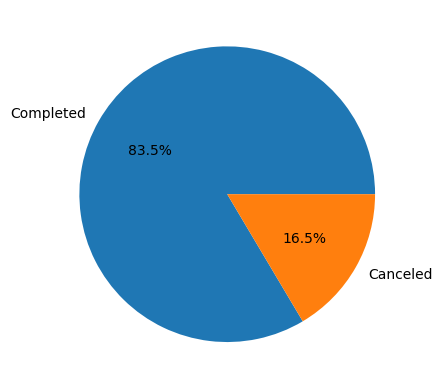

In [29]:
#Overall Cancellation Rate
overall_status = df_status[['Status']].value_counts()
status_label = ['Completed','Canceled']

plt.pie(overall_status,labels=status_label, autopct='%1.1f%%') #autopct = shows the percentage of value

In [47]:
overall_status

Status   
Completed    18536
Canceled      3654
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1fc8a3a2f10>,
 [Text(-1.0777036466615306, 0.22035165071412272, 'Completed'),
  Text(1.0777036363461243, -0.22035170116507183, 'Canceled')],
 [Text(-0.5878383527244712, 0.12019180948043055, '93.6%'),
  Text(0.5878383470978858, -0.12019183699913008, '6.4%')])

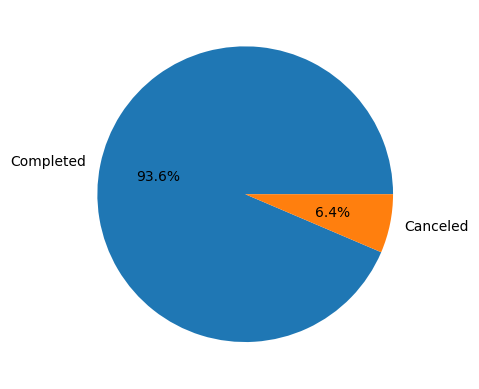

In [30]:
#Cancellation Rate by Sales
sales_cancel = df_status[['Sales','Status']].groupby('Status', sort=False)['Sales'].sum()
#sales_cancel_lab = ['Completed','Canceled']
plt.pie(sales_cancel,labels=status_label, autopct='%1.1f%%')

In [48]:
sales_cancel

Status
Completed    8911407.904
Canceled      611342.090
Name: Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x1fc8a3eb510>,
 [Text(-1.0862600338783146, 0.17331802791020703, 'Completed'),
  Text(1.0862600460487155, -0.1733179516329538, 'Canceled')],
 [Text(-0.5925054730245352, 0.09453710613284019, '95.0%'),
  Text(0.5925054796629357, -0.0945370645270657, '5.0%')])

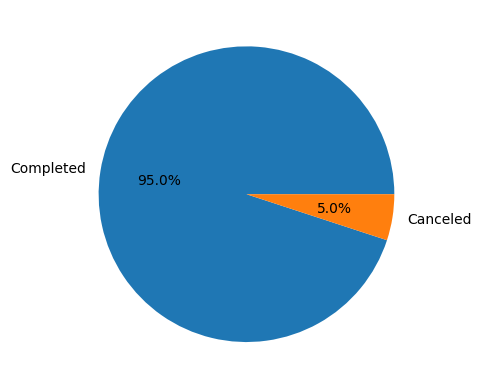

In [31]:
#Cancellation Rate by Quantity
qty_cancel = df_status[['Quantity','Status']].groupby('Status', sort=False)['Quantity'].sum()
plt.pie(qty_cancel,labels=status_label, autopct='%1.1f%%')

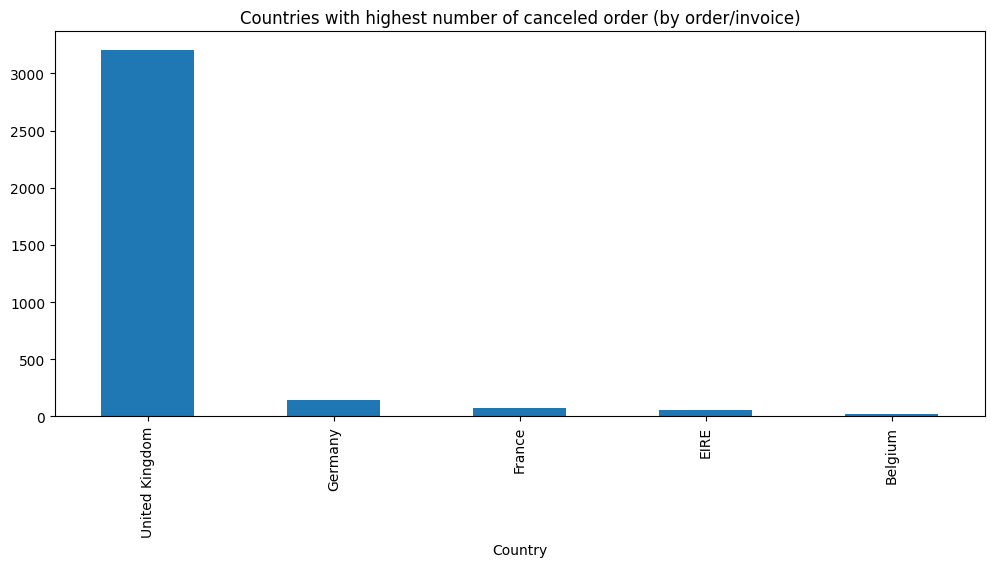

In [32]:
#Country with highest cancelation rate (by order/invoice)
country_c_order = df_status[df_status.Status == 'Canceled']
country_c_order = country_c_order[['Country','InvoiceNo']].groupby('Country')['InvoiceNo'].nunique().nlargest(5)

#Draw the plot
plot_c_order = country_c_order.plot(kind='bar', title='Countries with highest number of canceled order (by order/invoice)', figsize=(12,5))

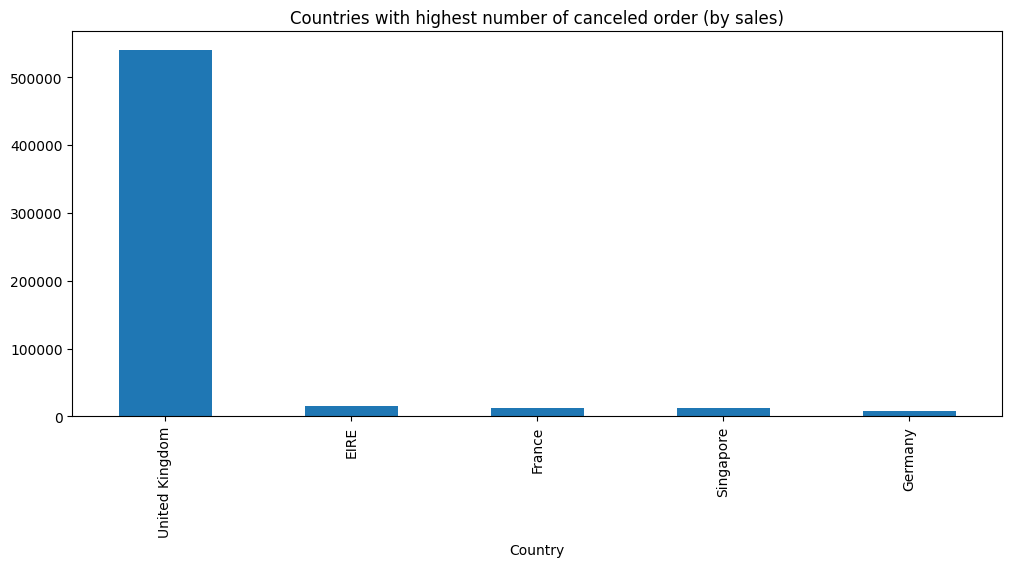

In [33]:
#Country with highest cancelation rate (by sales)
country_cancel = df_status[df_status.Status == 'Canceled']
country_cancel = country_cancel[['Country','Sales']].groupby('Country')['Sales'].sum().nlargest(5)

plot_country_c = country_cancel.plot(kind='bar', title='Countries with highest number of canceled order (by sales)', figsize=(12,5))


Text(0, 0.5, 'Sales in Pounds')

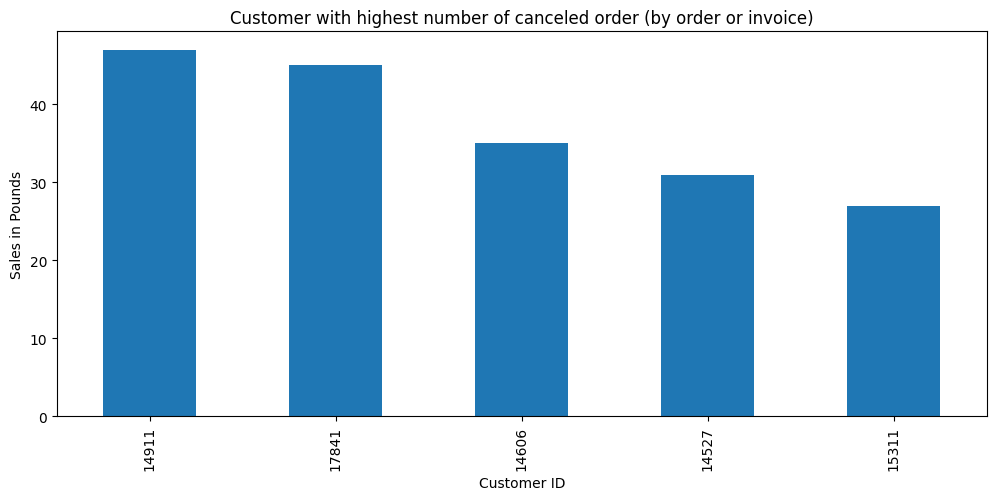

In [61]:
#Customer with highest number of canceled order
cust_cancel2 = df_status[df_status.Status == 'Canceled']
cust_cancel2 = cust_cancel2[['CustomerID','InvoiceNo']].groupby('CustomerID')['InvoiceNo'].nunique().nlargest(5)

#Draw the plot
plot_customer_c = cust_cancel2.plot(kind='bar', title='Customer with highest number of canceled order (by order or invoice)', figsize=(12,5))
plot_customer_c.set_xlabel('Customer ID')
plot_customer_c.set_ylabel('Sales in Pounds')

In [59]:
cust_cancel

CustomerID
16446    168469.60
12346     77183.60
15098     39267.00
16029     30032.23
15749     22998.40
Name: Sales, dtype: float64

In [62]:
cust_cancel2

CustomerID
14911    47
17841    45
14606    35
14527    31
15311    27
Name: InvoiceNo, dtype: int64

Text(0, 0.5, 'Sales in Pounds')

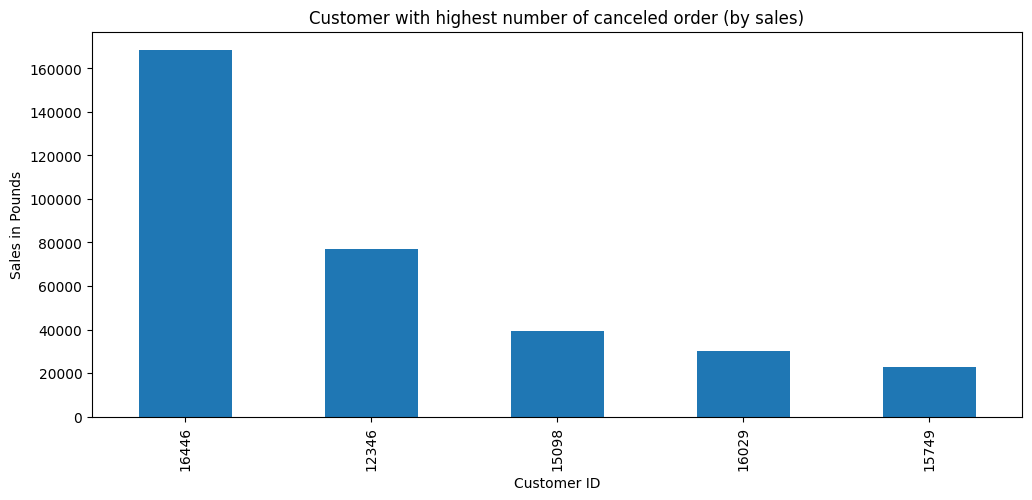

In [35]:
#Customer with highest number of canceled order by sales
cust_cancel = df_status[df_status.Status == 'Canceled']
cust_cancel = cust_cancel[['CustomerID','Sales']].groupby('CustomerID')['Sales'].sum().nlargest(5)

#Draw the plot
plot_customer_c = cust_cancel.plot(kind='bar', title='Customer with highest number of canceled order (by sales)', figsize=(12,5))
plot_customer_c.set_xlabel('Customer ID')
plot_customer_c.set_ylabel('Sales in Pounds')

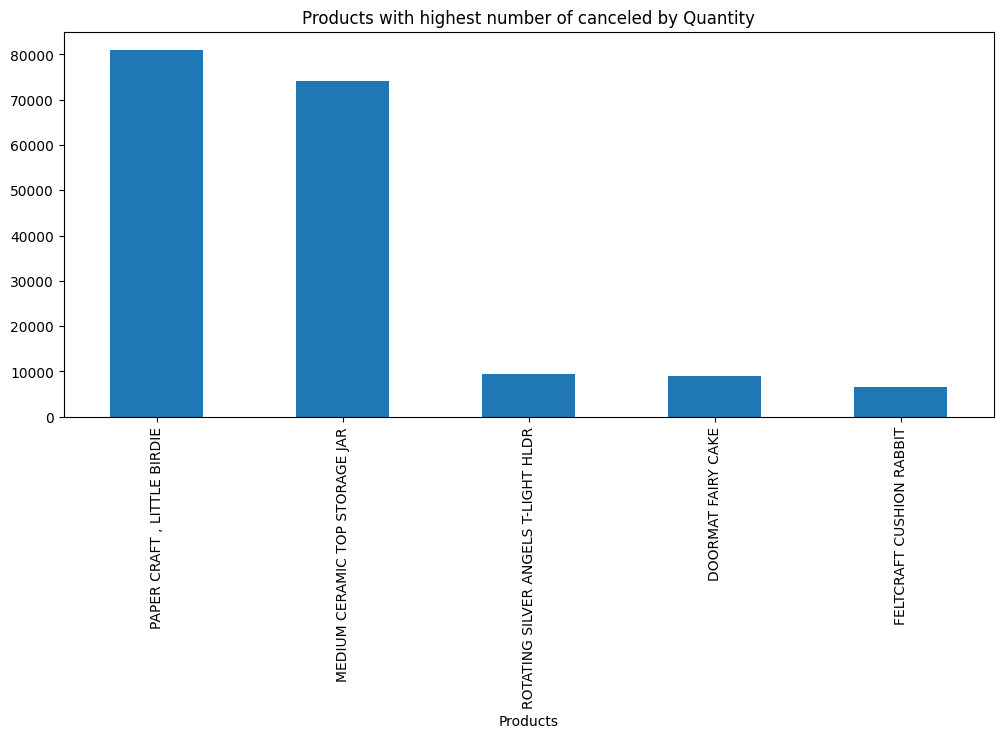

In [36]:
#Products with highest number of cancelation
product_cancel = df_status[df_status.Status == 'Canceled']
product_cancel = product_cancel[['Products','Quantity']].groupby('Products')['Quantity'].sum().nlargest(5)

plot_pcancel = product_cancel.plot(kind='bar', title='Products with highest number of canceled by Quantity', figsize=(12,5))

Customer behavior

In [37]:
#Highest Spending Customer Data
consumer_high = df.copy()
consumer_high = consumer_high[['CustomerID','Sales','InvoiceNo','Country']].groupby('CustomerID', as_index=False).agg({'Sales':'sum','InvoiceNo':'nunique','Country':'first'})
consumer_high = consumer_high.sort_values(by=['Sales'], ascending=False)

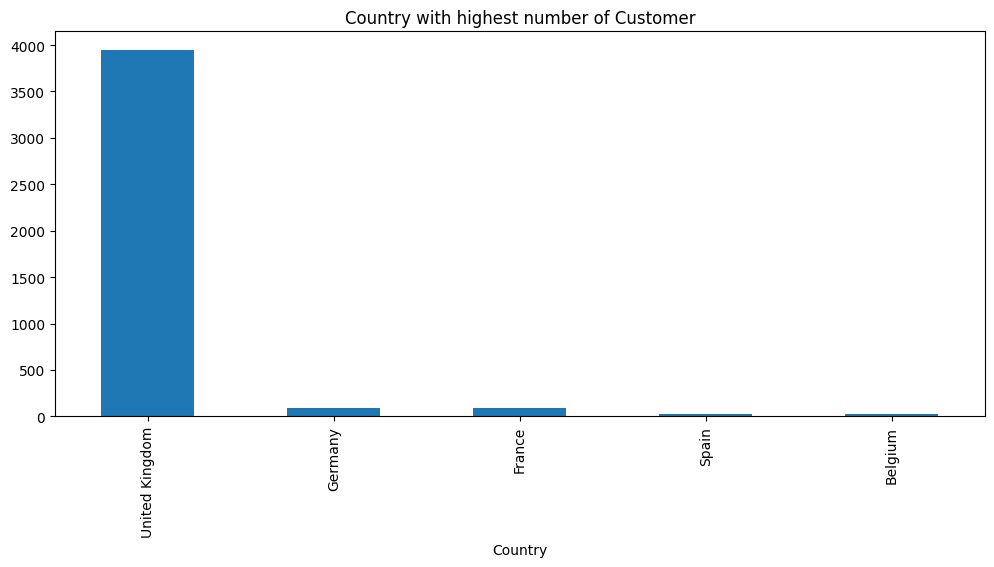

In [38]:
#Number of Customer of Each country
country_cust = consumer_high[['Country','CustomerID']].groupby('Country')['CustomerID'].nunique().nlargest(5)

#Draw the plot
plot_country_cust = country_cust.plot(kind='bar', title='Country with highest number of Customer', figsize=(12,5))

In [63]:
country_cust

Country
United Kingdom    3950
Germany             95
France              87
Spain               29
Belgium             24
Name: CustomerID, dtype: int64

In [39]:
#Highest Spending Cust by Sales
top_spend_cust = consumer_high[['CustomerID','Sales','Country']].nlargest(n=5,columns='Sales')
top_spend_cust

,CustomerID,Sales,Country
1703,14646,279489.02,Netherlands
4233,18102,256438.49,United Kingdom
3758,17450,187482.17,United Kingdom
1895,14911,132572.62,EIRE
55,12415,123725.45,Australia


In [40]:
#Highest Spending Cust by Order
top_spend_cust = consumer_high[['CustomerID','InvoiceNo','Country']].nlargest(n=5,columns='InvoiceNo')
top_spend_cust

,CustomerID,InvoiceNo,Country
1895,14911,248,EIRE
330,12748,224,United Kingdom
4042,17841,169,United Kingdom
1674,14606,128,United Kingdom
2192,15311,118,United Kingdom


In [41]:
consumer_high.head()

,CustomerID,Sales,InvoiceNo,Country
1703,14646,279489.02,77,Netherlands
4233,18102,256438.49,62,United Kingdom
3758,17450,187482.17,55,United Kingdom
1895,14911,132572.62,248,EIRE
55,12415,123725.45,26,Australia


In [42]:
#Highest average spending country
top_avg = consumer_high.copy()
top_avg = top_avg.groupby('Country', as_index=False).agg({'CustomerID':'nunique','Sales':'sum','InvoiceNo':'sum'}) #group by country
top_avg.head()

,Country,CustomerID,Sales,InvoiceNo
0,Australia,9,138467.41,72
1,Austria,9,9439.14,17
2,Bahrain,2,548.40,2
3,Belgium,24,41265.88,119
4,Brazil,1,1143.60,1


In [43]:
#Highest Average Spending Per Customer of Each Country
top_avg_cust = top_avg.copy()
top_avg_cust['AvgSpendCust'] = top_avg_cust['Sales'] / top_avg_cust['CustomerID']
top_avg_cust = top_avg_cust.sort_values(by=['AvgSpendCust'], ascending=False).nlargest(n=5, columns='AvgSpendCust')
top_avg_cust

,Country,CustomerID,Sales,InvoiceNo,AvgSpendCust
10,EIRE,3,250285.22,319,83428.406667
23,Netherlands,9,284661.54,101,31629.060000
0,Australia,9,138467.41,72,15385.267778
29,Singapore,1,9120.39,10,9120.390000
31,Sweden,8,36595.91,46,4574.488750


In [44]:
#Highest Average Spending Per Order of Each Country
top_avg_ord = top_avg.copy()
top_avg_ord['AvgSpendOrd'] = top_avg_ord['Sales'] / top_avg_ord['InvoiceNo']
top_avg_ord = top_avg_ord.sort_values(by=['AvgSpendOrd'], ascending=False).nlargest(n=5, columns='AvgSpendOrd')
top_avg_ord

,Country,CustomerID,Sales,InvoiceNo,AvgSpendOrd
23,Netherlands,9,284661.54,101,2818.431089
0,Australia,9,138467.41,72,1923.158472
20,Lebanon,1,1693.88,1,1693.880000
19,Japan,8,35340.62,28,1262.165000
17,Israel,4,6994.25,6,1165.708333
